## Assignment 2


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.datasets import make_classification, make_blobs
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X, y = make_blobs(n_samples=500, centers=2, n_features=2, random_state=0)

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

intercept = np.ones((X_train.shape[0], 1))
X_train = np.concatenate((intercept, X_train), axis=1)
intercept = np.ones((X_test.shape[0], 1))
X_test = np.concatenate((intercept, X_test), axis=1)


class LogisticRegression:
    
    def __init__(self, method='mini-batch',max_iter=1000, alpha=0.001):
        self.method = method
        self.max_iter = max_iter
        self.alpha = alpha
    
    def mini_batch_GD(self,X,y):
        
        self.w = np.zeros(X.shape[1])
        
        self.loss = []
        self.iters = []
        
        batch_size = int(0.1 * X.shape[0])
        
        for i in range(self.max_iter):
            
            shuffled_index = np.random.permutation(X.shape[0])
            X_shuffled = X[shuffled_index]
            y_shuffled = y[shuffled_index]
            
            for index in range(0, X.shape[0], batch_size):
                
                batch_X = X_shuffled[index : index + batch_size]
                batch_y = y_shuffled[index : index + batch_size]
                
                cost, grad = self.gradient(batch_X, batch_y, self.w)
                self.w =self. w - self.alpha * grad
                
            if i % 500 ==0:
                print(f"Cost at iteration {i}", cost)
                self.loss.append(cost)
                self.iters.append(i)
                
        return self.w, i
    
    def plot(self):
        plt.plot(self.iters, self.loss, label='Training Losses')
        plt.xlabel('num of iters')
        plt.ylabel('training loss')
        plt.title('Training loss vs number of iters')
        plt.legend()
    
    def gradient(self, X, y, w):
        m = X.shape[0]
        h = self.h_theta(X)
        error = h - y
        cost = -np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
        grad = np.dot(X.T, error)
        return cost, grad
    
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
    
    def h_theta(self,X):
        return self.sigmoid(X @ self.w)
    
    def output(self, pred):
        return np.round(pred)
    

In [2]:
model = LogisticRegression(max_iter=20000)
w, i = model.mini_batch_GD(X_train, y_train)

Cost at iteration 0 21.823607888045277
Cost at iteration 500 5.193204836615287
Cost at iteration 1000 6.144294967066297
Cost at iteration 1500 8.186155873924998
Cost at iteration 2000 4.77547167190032
Cost at iteration 2500 5.842047043158074
Cost at iteration 3000 2.080813007668685
Cost at iteration 3500 9.670748539017627
Cost at iteration 4000 1.2407035035675786
Cost at iteration 4500 5.397073473752706
Cost at iteration 5000 0.17450976175330424
Cost at iteration 5500 1.4321333285722515
Cost at iteration 6000 1.4285612194594979
Cost at iteration 6500 0.3474046024985202
Cost at iteration 7000 2.1839565540281183
Cost at iteration 7500 3.5457849119571807
Cost at iteration 8000 5.158126373711129
Cost at iteration 8500 1.2449523856460094
Cost at iteration 9000 4.008972817848466
Cost at iteration 9500 1.155592865627422
Cost at iteration 10000 2.091882455182171
Cost at iteration 10500 2.2622309394780054
Cost at iteration 11000 5.523611529647483
Cost at iteration 11500 1.0328201844425333
Cost 

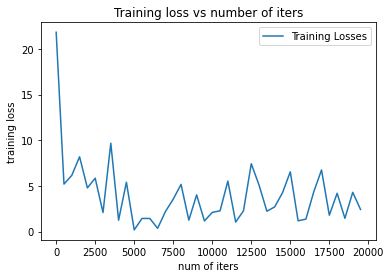

In [3]:
model.plot()

In [4]:
yhat = model.h_theta(X_test)
y_pred = model.output(yhat)
y_pred

array([1., 0., 1., 1., 1., 0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 1., 1.,
       0., 1., 0., 0., 0., 1., 0., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0.,
       1., 0., 0., 1., 1., 1., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 1.,
       0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 1., 1., 0.,
       0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0.,
       1., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0.,
       1., 0., 0., 1., 0., 1., 1., 1., 0., 1., 0., 1., 0., 1., 1., 1., 0.,
       1., 0., 0., 1., 1., 1., 0., 1., 0., 0., 1., 1., 1., 1., 0., 1., 1.,
       0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0.])

In [5]:
class classification_report:
    
    def __init__(self, actual, predict):
        self.actual = actual
        self.predict = predict
        
        self.TP = sum((self.actual == 1) & (self.predict == 1))
        self.TN = sum((self.actual == 0) & (self.predict == 0))
        self.FP = sum((self.actual == 0) & (self.predict ==1))
        self.FN = sum((self.actual == 1) & (self.predict == 0))
    
    def accuracy(self):
        self.acc = (self.TP + self.TN) / float(self.TP + self.TN + self.FP + self.FN)
        return self.acc
    
    def precision(self):
        self.pre = self.TP / float(self.TP + self.FP)
        return self.pre
    
    def recall(self):
        self.rec = self.TP / float(self.TP + self.FN)
        return self.rec
    
    def f1(self):
        self.F1 = 2 * (self.precision() * self.recall()) / (self.precision() + self.recall())
        return self.F1

In [6]:
report = classification_report(y_test, y_pred)
accuracy = report.accuracy()
recall = report.recall()
precision = report.precision()
f1 = report.f1()
print(f"accuracy: {accuracy}")
print(f"recall: {recall}")
print(f"precision: {recall}")
print(f"f1: {f1}")

accuracy: 0.9533333333333334
recall: 0.9436619718309859
precision: 0.9436619718309859
f1: 0.9503546099290779


In [7]:
# checking wherethere it is correct or not
from sklearn.metrics import classification_report
print("Report: ", classification_report(y_test, y_pred))

Report:                precision    recall  f1-score   support

           0       0.95      0.96      0.96        79
           1       0.96      0.94      0.95        71

    accuracy                           0.95       150
   macro avg       0.95      0.95      0.95       150
weighted avg       0.95      0.95      0.95       150

